<a href="https://colab.research.google.com/github/eliscmatt/Colab/blob/main/CO2_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Carregar o dataset
uploaded = files.upload()
df = pd.read_excel("DATASET_CO2.xlsx")

Saving DATASET_CO2.xlsx to DATASET_CO2.xlsx


In [ ]:
# Exibir a estrutura do dataframe
print(df.head())
df.info()

   ID  MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0   1       2014  ACURA         ILX      COMPACT         2.0          4   
1   2       2014  ACURA         ILX      COMPACT         2.4          4   
2   3       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3   4       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4   5       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           19

In [ ]:
# Selecionar as colunas para a regressão
X = df[['ENGINESIZE']]
y = df[['CO2EMISSIONS']]
print(X.head())
print(y.head())

   ENGINESIZE
0         2.0
1         2.4
2         1.5
3         3.5
4         3.5
   CO2EMISSIONS
0           196
1           221
2           136
3           255
4           244


In [ ]:
# Dividir o dataset em conjuntos de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25, random_state=3)

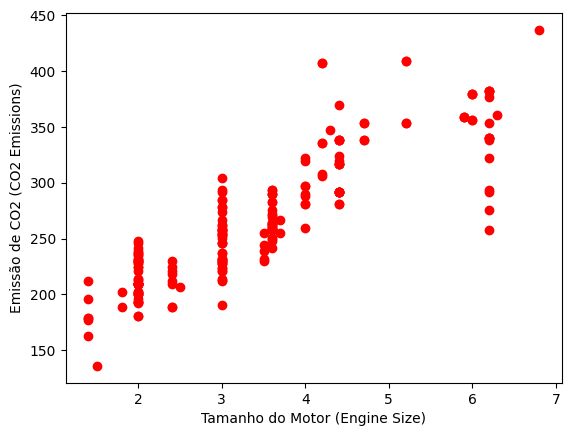

In [ ]:
# Plotar a relação entre ENGINESIZE e CO2EMISSIONS
plt.scatter(X, y, color='red')
plt.xlabel("Tamanho do Motor (Engine Size)")
plt.ylabel("Emissão de CO2 (CO2 Emissions)")
plt.show()

In [ ]:
# Criar e treinar o modelo de regressão linear
modelo = linear_model.LinearRegression()
modelo.fit(X_treino, y_treino)

LinearRegression()

In [ ]:
# Exibir os coeficientes do modelo
print('(M) Inclinação: ', modelo.coef_)
print('(B) Intercepto: ', modelo.intercept_)

(M) Inclinação:  [[35.75317017]]
(B) Intercepto:  [140.74518994]


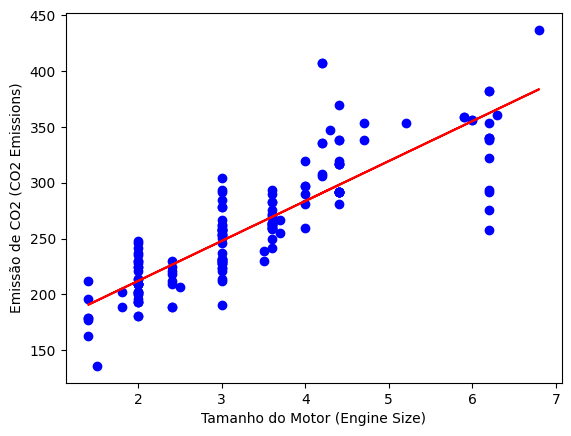

In [ ]:
# Plotar a linha de regressão no conjunto de treino
plt.scatter(X_treino, y_treino, color='blue')
plt.plot(X_treino, modelo.coef_[0][0] * X_treino + modelo.intercept_[0], '-r')
plt.xlabel("Tamanho do Motor (Engine Size)")
plt.ylabel("Emissão de CO2 (CO2 Emissions)")
plt.show()

In [ ]:
# Fazer predições no conjunto de teste
predicoes = modelo.predict(X_teste)

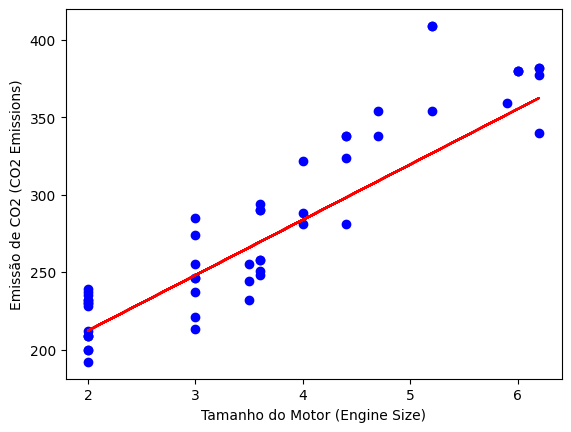

In [ ]:
# Plotar a linha de regressão no conjunto de teste
plt.scatter(X_teste, y_teste, color='blue')
plt.plot(X_teste, modelo.coef_[0][0] * X_teste + modelo.intercept_[0], '-r')
plt.xlabel("Tamanho do Motor (Engine Size)")
plt.ylabel("Emissão de CO2 (CO2 Emissions)")
plt.show()

In [ ]:
# Mostrar as métricas de avaliação do modelo
print("Soma dos Erros ao Quadrado (SSE): %.2f" % np.sum((predicoes - y_teste)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(y_teste, predicoes))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(y_teste, predicoes))
print("Raiz do Erro Quadrático Médio (RMSE): %.2f " % sqrt(mean_squared_error(y_teste, predicoes)))
print("R2-score: %.2f" % r2_score(y_teste, predicoes))

Soma dos Erros ao Quadrado (SSE): 38896.15
Erro Quadrático Médio (MSE): 733.89
Erro Médio Absoluto (MAE): 21.78
Raiz do Erro Quadrático Médio (RMSE): 27.09 
R2-score: 0.81


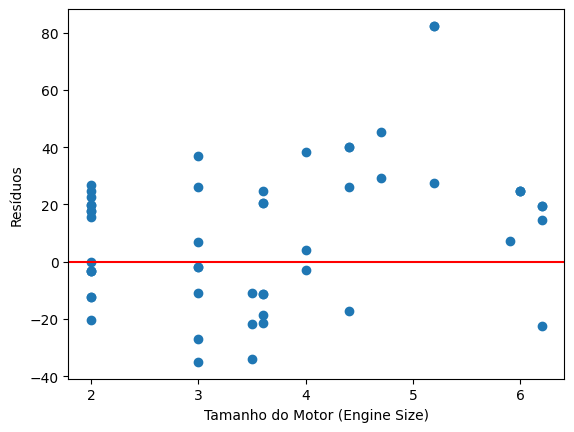

In [ ]:
# Analisar possíveis outliers
residuos = y_teste - predicoes
plt.scatter(X_teste, residuos)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Tamanho do Motor (Engine Size)")
plt.ylabel("Resíduos")
plt.show()

In [ ]:
# Solicitar ao usuário o tamanho do motor e prever a emissão de CO2
engine_size_input = float(input("Digite o tamanho do motor em litros (Engine Size): "))
entrada = [[engine_size_input]]
previsao = modelo.predict(entrada)[0]

Digite o tamanho do motor em litros (Engine Size): 2.0


In [ ]:
print(f"Emissão de CO2 prevista: {previsao[0]:.2f} g/km")